In [1]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

## Data Collection

In [3]:
data = pd.read_csv("/home/nithish07/Drive-D/fraud_Detection_DTRF/dataset/dataset_f.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


- step- maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).


- type- CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.


- amount- amount of the transaction in local currency.


- nameOrig- customer who started the transaction


- oldbalanceOrg- initial balance before the transaction


- newbalanceOrig- new balance after the transaction


- nameDest- customer who is the recipient of the transaction


- oldbalanceDest- initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).


- newbalanceDest- new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).


- isFraud- This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent

In [5]:
# last 5 rows

data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## Exploratory Data Analysis

In [6]:
# num of rows and columns

data.shape

(6362620, 11)

**Observation:**
- Therefore, the dataset have 63,62,620 rows and 11 columns

In [7]:

# information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Observatin:**
- This shows (type,nameOrig, nameDest)- are catogotical type and all others are all numerical type

In [8]:
data.isnull().sum()

# this shows there is no null values in the dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
# statistical analysis

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
# No. of Legit and Non Legit(fraud) transcations

legit = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100
print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


**This shows there was imbalance in the dataset. We must have to perform SMOTE to balance the data**

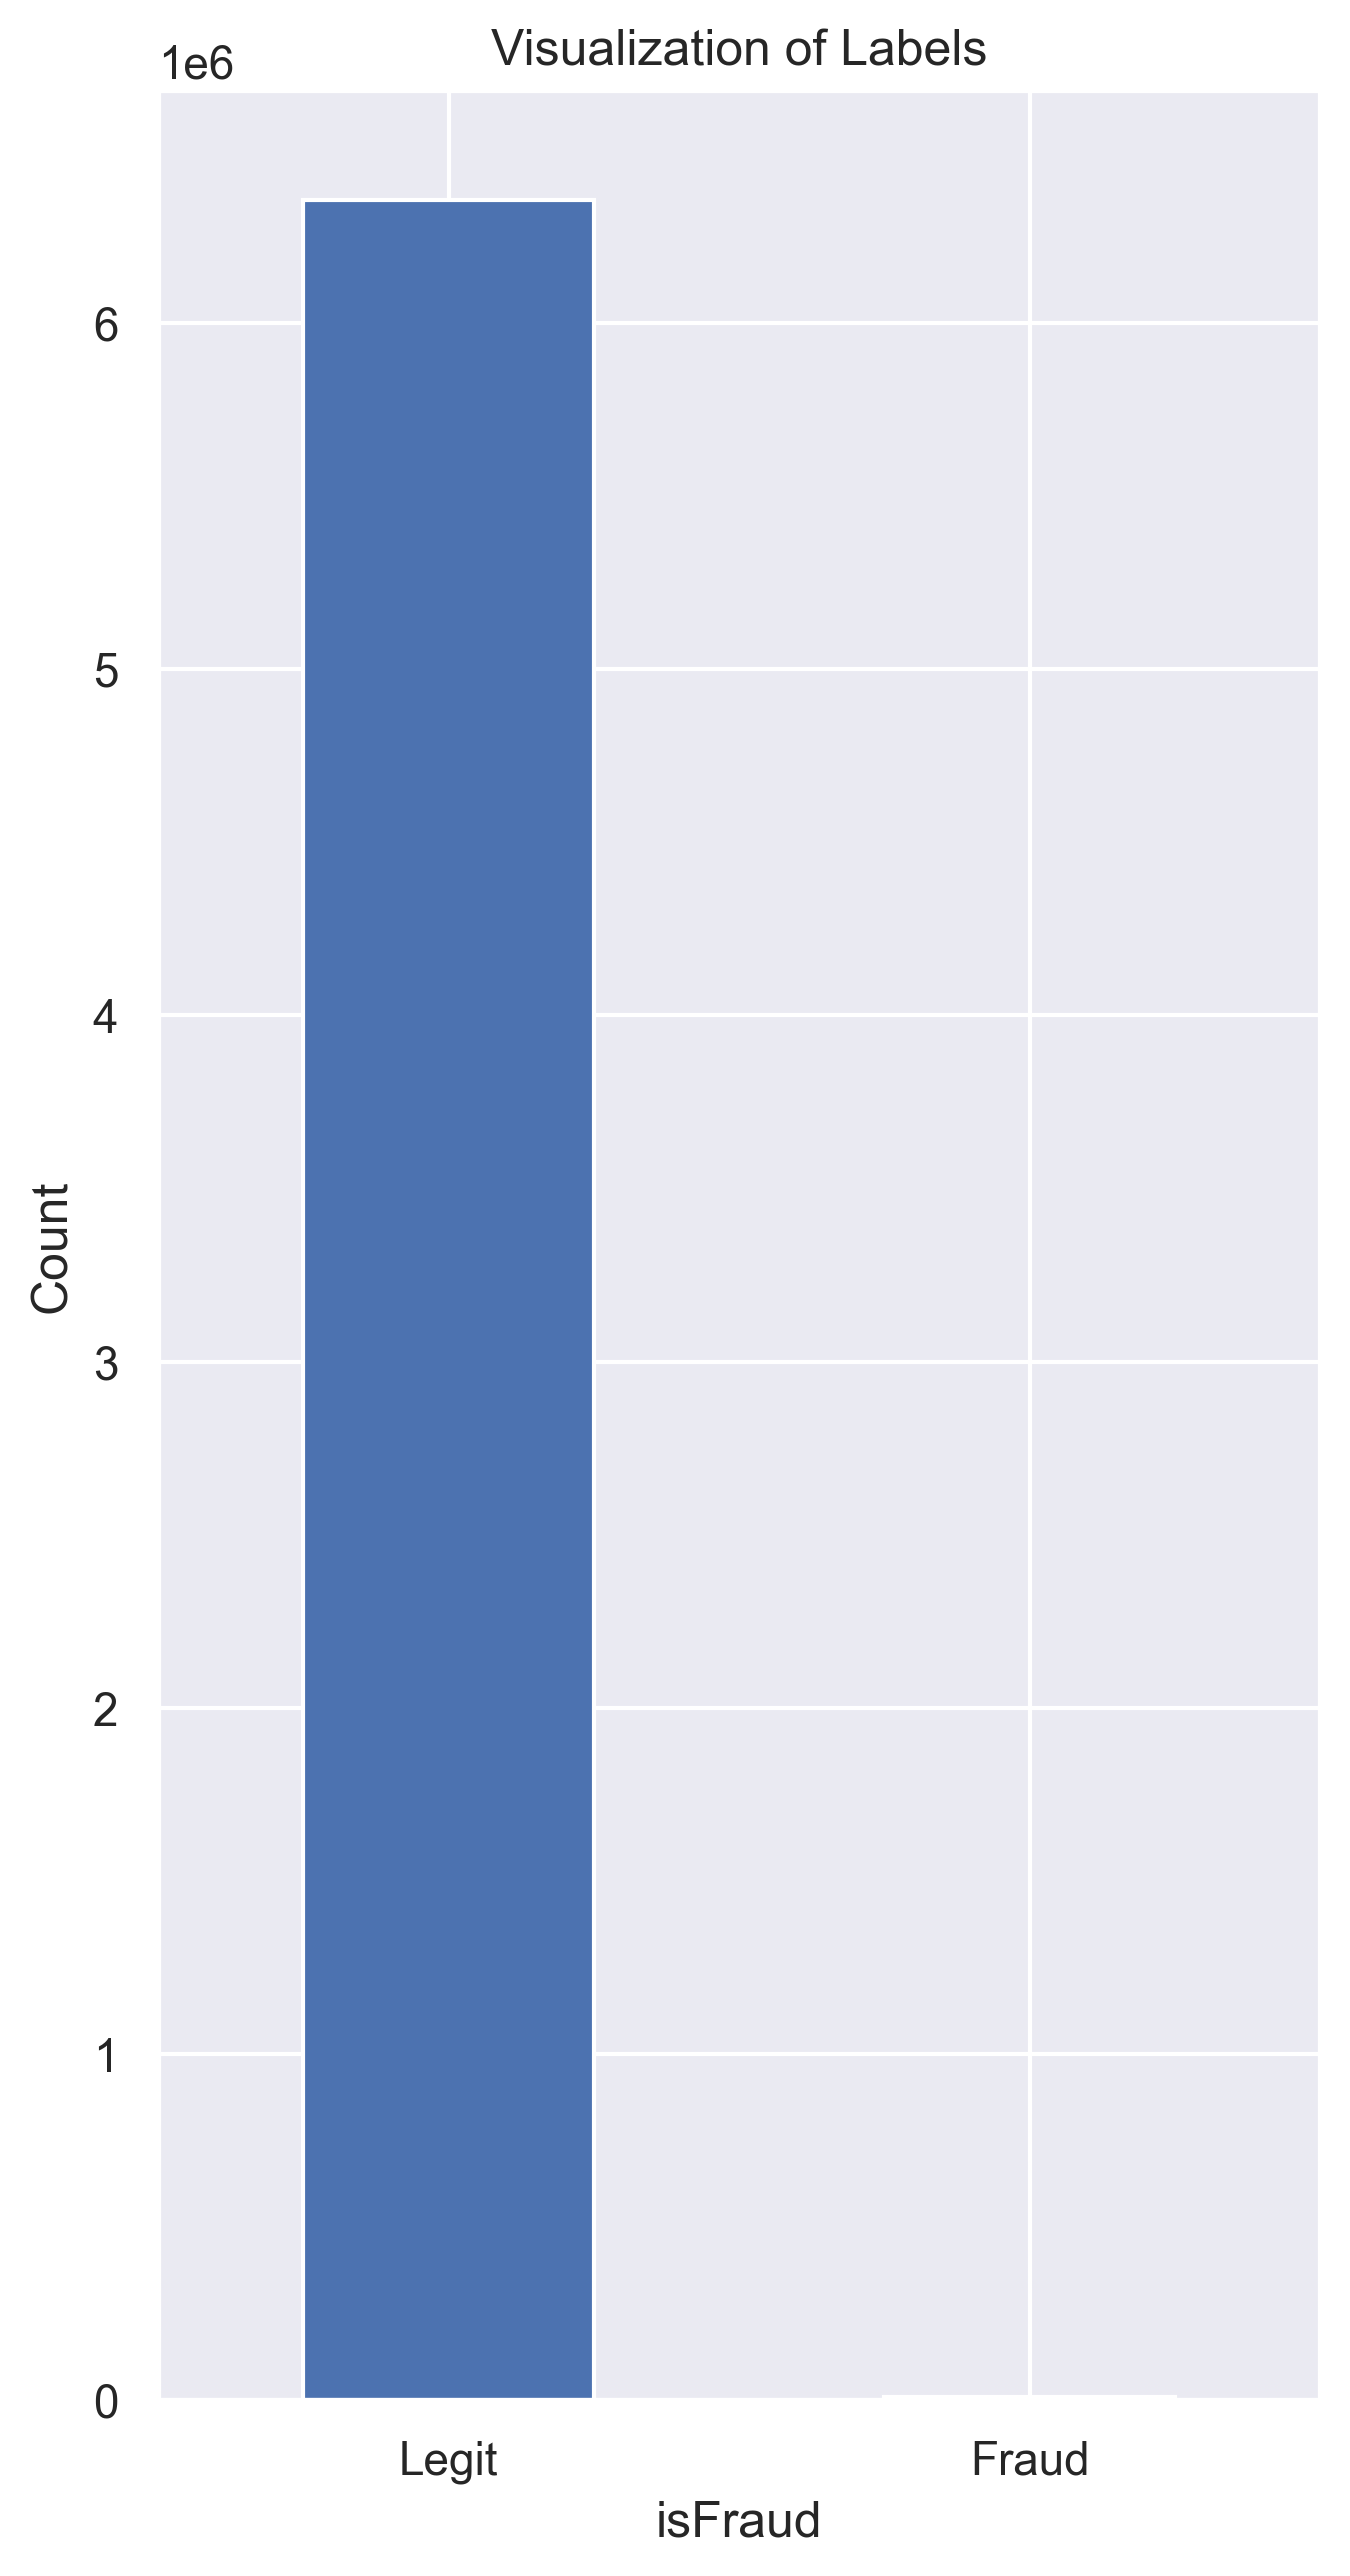

In [12]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = data.value_counts(data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


**total num of legit and fraud transcations have a greater skewness (imbalanced in the dataset) we must have to perform SMOTE**

# Feature Engineerning And Data Preprocessing

In [13]:
#preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
# handling datatypes

data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
# find uniqueness in all the columns

for i in data.columns:
    print('Unique Values in "{}":\n'.format(i),data[i].unique(), "\n\n")

Unique Values in "step":
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 

**There is no need to handle dtpyes as per the result above**

In [16]:
#creating a copy of original dataset to train and test models

new_df=data.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
# Renaming column names for convenience

new_df.columns = ['Transaction_Hours','Type','Transaction_Amt','Sender','Sender_Bal_b4','Sender_Bal_After','Receiver','Receiver_Bal_b4','Receiver_Bal_After','isFraud','isFlaggedFraud']

In [18]:
# Features with numerical value

features = ['Transaction_Amt','Sender_Bal_b4', 'Transaction_Hours','Sender_Bal_After','Receiver_Bal_b4','Receiver_Bal_After']

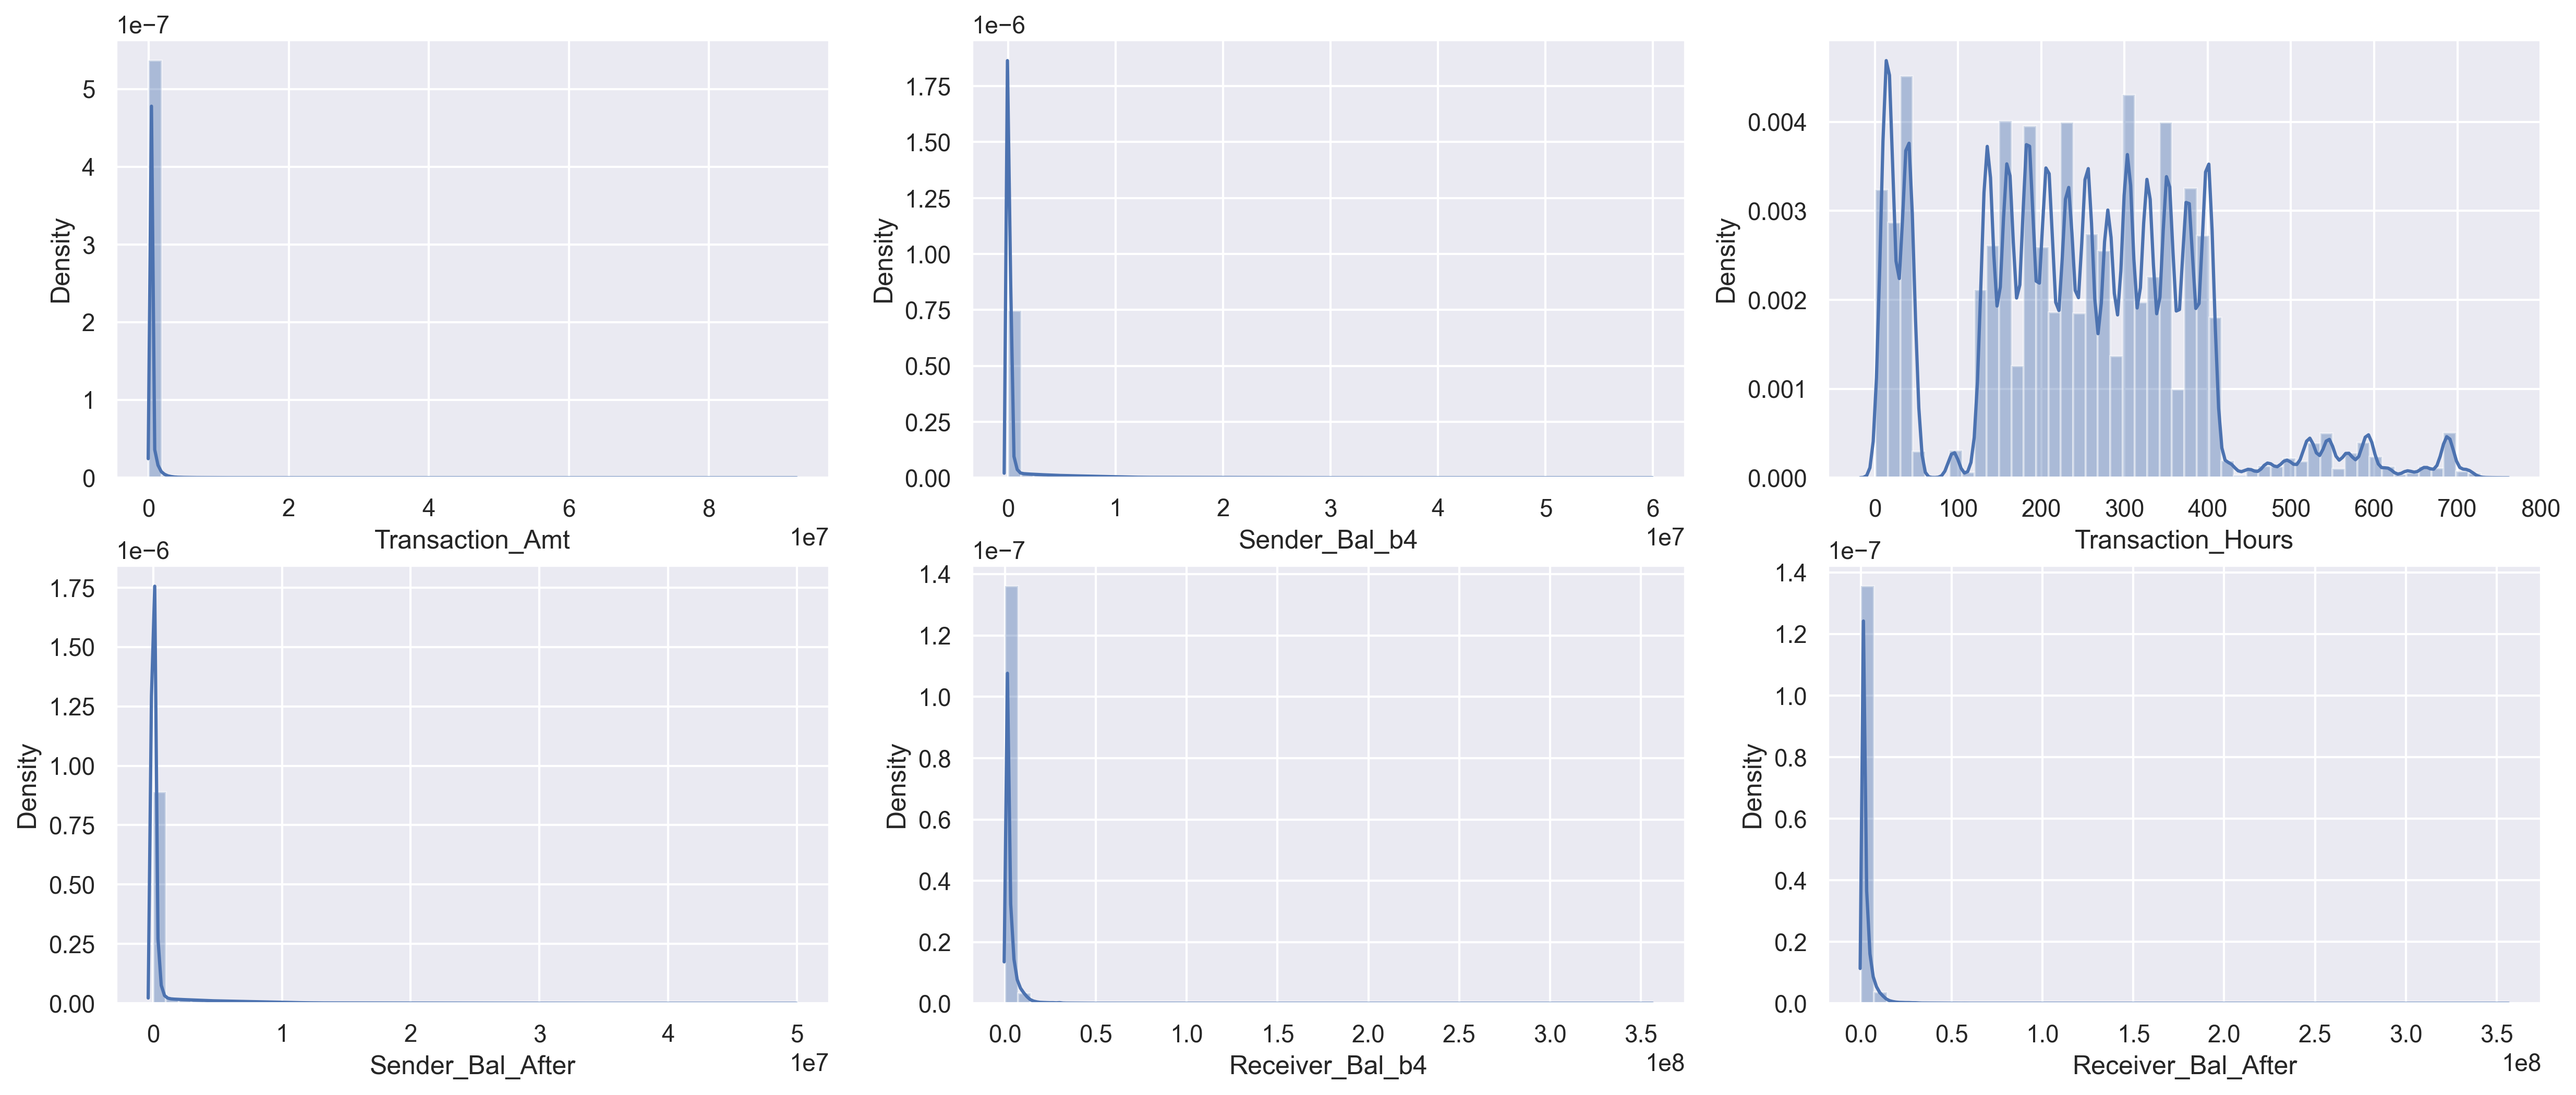

In [19]:
# Plotting all numerical features for distrubution check

plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.distplot(new_df[feature])
plt.show()

- All features except 'Transaction_Hours' have right skewed distribution

- Skewed data - When a distribution is skewed it means data is asymmetrucally distributed and indicates the presence of outliers

- The direction of skewness shows the directon of the outliers either in postive or negative end.

- It can be rectified by removing outliers, normalizing or transforming the data using log, boxcox or polynomial transformation

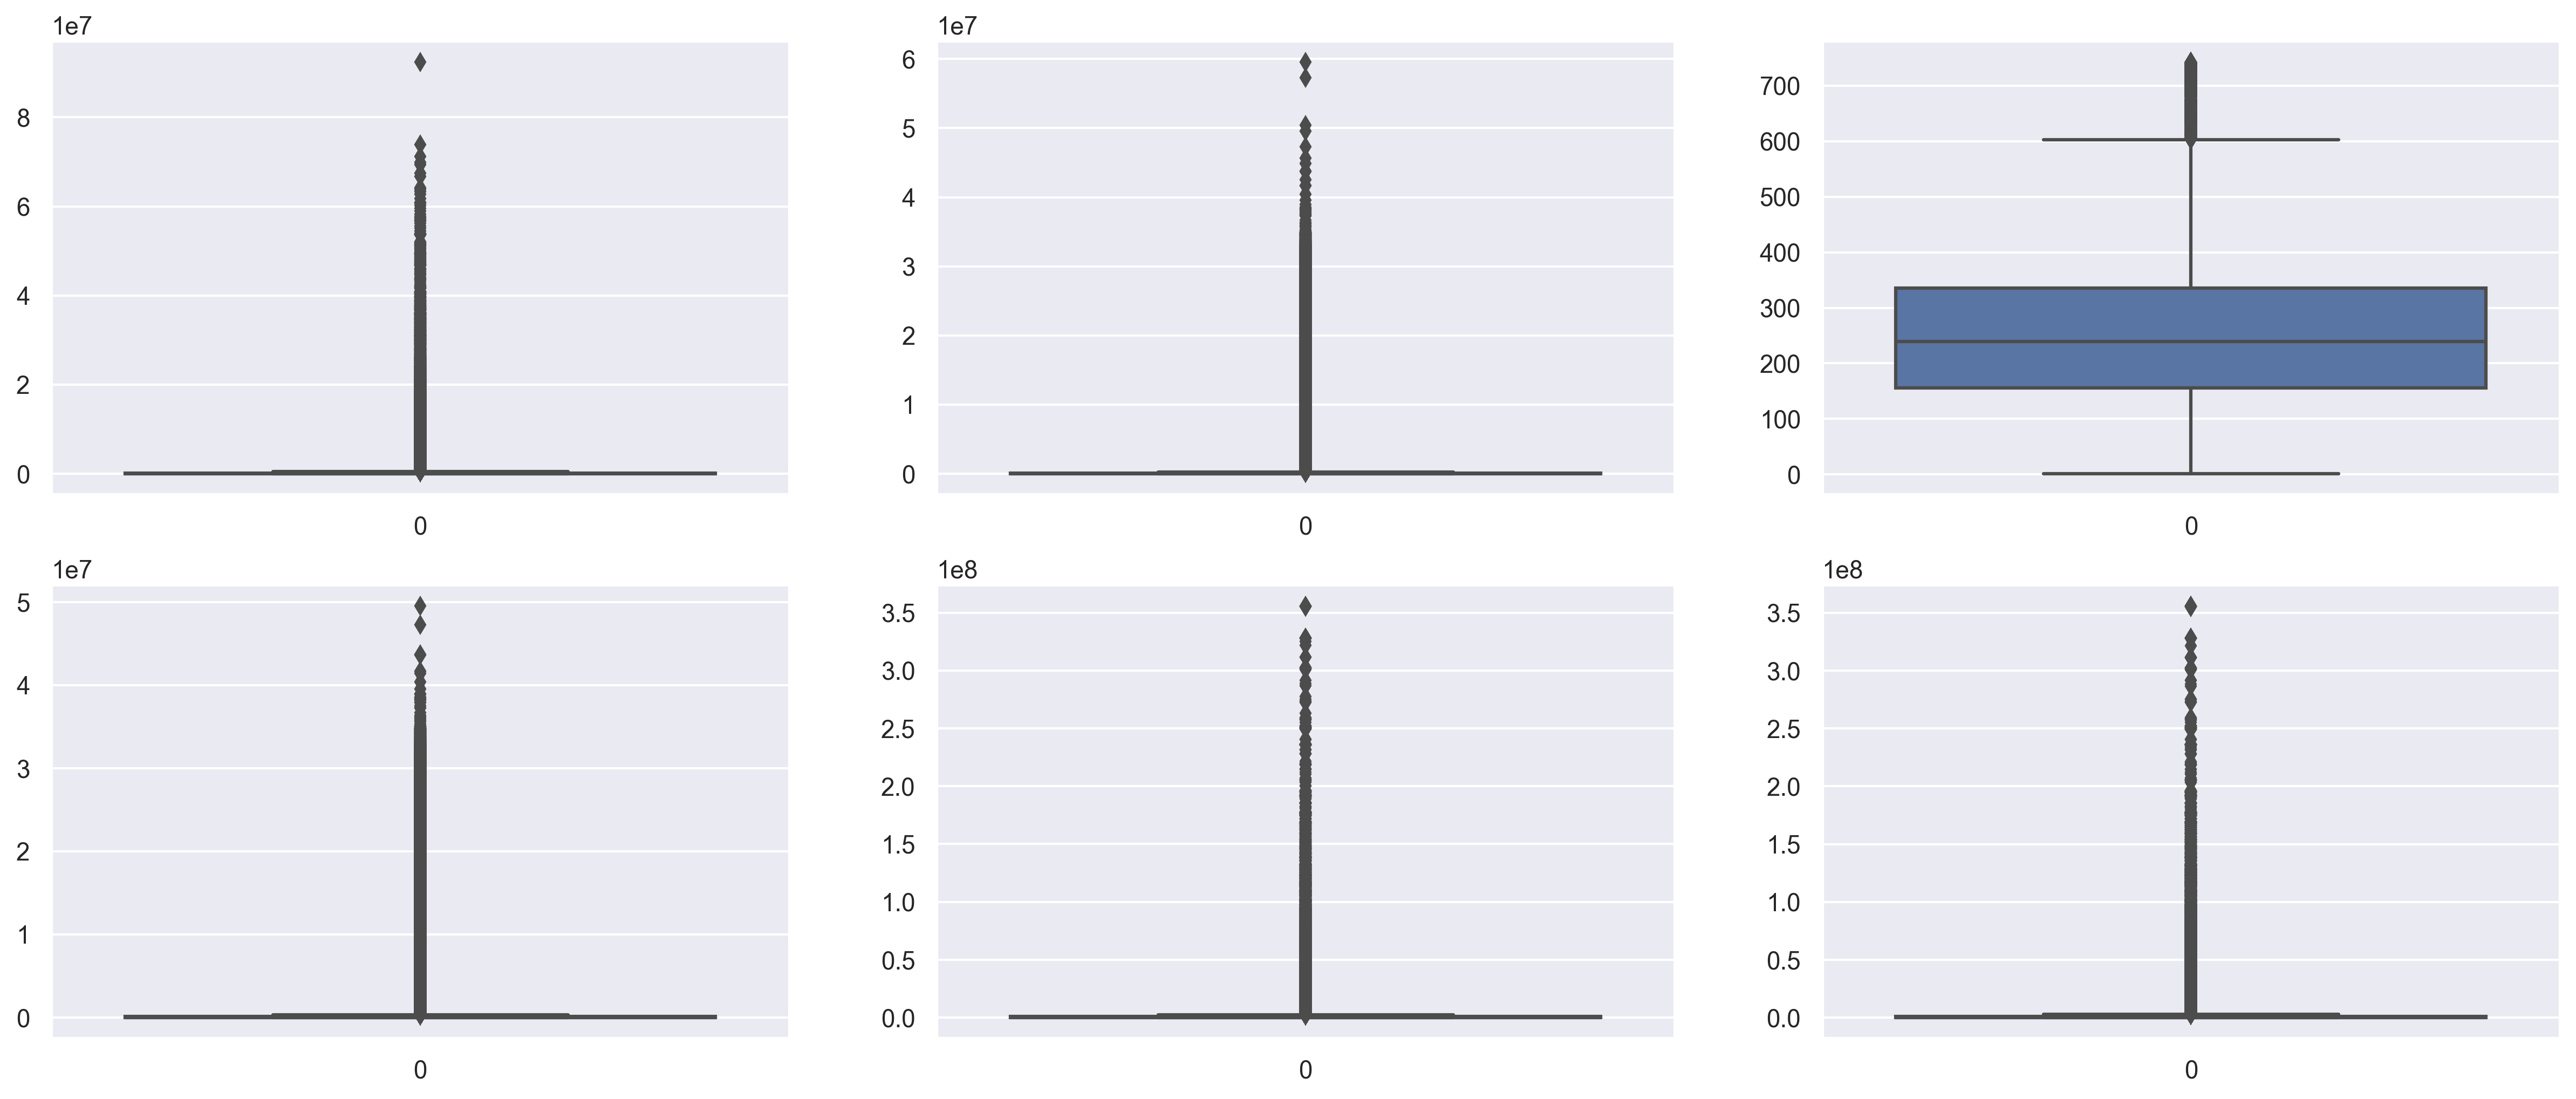

In [20]:
# Plotting boxplot to find the outliers
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.boxplot(new_df[feature])
plt.show()

In [21]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['Type', 'Sender', 'Receiver'], dtype='object')


**THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.** 

###  Label Encoding

In [22]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Transaction_Hours   int64  
 1   Type                int64  
 2   Transaction_Amt     float64
 3   Sender              int64  
 4   Sender_Bal_b4       float64
 5   Sender_Bal_After    float64
 6   Receiver            int64  
 7   Receiver_Bal_b4     float64
 8   Receiver_Bal_After  float64
 9   isFraud             int64  
 10  isFlaggedFraud      int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [23]:
#after encodind the data

new_df.head(10)

,Transaction_Hours,Type,Transaction_Amt,Sender,Sender_Bal_b4,Sender_Bal_After,Receiver,Receiver_Bal_b4,Receiver_Bal_After,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.0,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.0,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.0,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.0,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.0,40348.79,0,0


**MULTICOLINEARITY**

**We can see that Sender_Bal_b4 and Sender_Bal_After have too high VIF thus they are highly correlated. Similarly Receiver_Bal_b4 and Receiver_Bal_After. Also Receiver is connected to Sender.**

**Thus combine these pairs of collinear attributes and drop the individual ones.**

In [ ]:
new_df['Actual_amount_orig(Sender)'] = new_df.apply(lambda x: x['Sender_Bal_b4'] - x['Sender_Bal_After'],axis=1)
new_df['Actual_amount_dest(Receiver)'] = new_df.apply(lambda x: x['Receiver_Bal_b4'] - x['Receiver_Bal_After'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['Sender'] + x['Receiver'],axis=1)

#Dropping columns
new_df = new_df.drop(['Transaction_Hours','Sender','Sender_Bal_b4','Sender_Bal_After','Receiver','Receiver_Bal_b4','Receiver_Bal_After'],axis=1)



In [ ]:
for i in new_df.columns:
    print('Unique Values in "{}":\n'.format(i),new_df[i].unique(), "\n\n")

In [ ]:
features =['Transaction_Amt','Actual_amount_orig(Sender)','Actual_amount_dest(Receiver)','TransactionPath']

In [ ]:
# Removing outliers using Inter-Quartile Range (IQR) proximity rule  

for feature in features:
  percentile25 = new_df[feature].quantile(0.25)
  percentile75 = new_df[feature].quantile(0.75)
  percentile50 = new_df[feature].quantile(0.50)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  new_df[feature] = np.where(new_df[feature] > upper_limit,new_df[feature].mean(),new_df[feature])
  new_df[feature] = np.where(new_df[feature] < lower_limit,new_df[feature].mean(),new_df[feature])

In [ ]:
# Correlation between features and target 

new_df.corr()

In [ ]:
# Plotting after removing outliers

plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')
for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.distplot(new_df[feature])
plt.show()

plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')
for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.boxplot(new_df[feature])
plt.show()

In [ ]:
new_df.shape

In [ ]:
new_df.isFraud.value_counts()

# we have to sample the data to retify the imbalance in the dataset

##  Scaling


In [ ]:
x = new_df.drop(["isFraud","isFlaggedFraud","Type"], axis= 1)

y = new_df["isFraud"]


In [ ]:
x.head()

In [ ]:
# scaling

names = x.columns
names

In [ ]:
scaler = StandardScaler()

In [ ]:
for i in names:
	x[i] = scaler.fit_transform(x[i].values.reshape(-1, 1))

In [ ]:
x = pd.DataFrame(x,columns = names)

In [ ]:
x["isFlaggedFraud"] = new_df.isFlaggedFraud
x["Type"] = new_df.Type

In [ ]:
# Dataframe of x After scaling

x.head()

In [ ]:
x.shape,y.shape

## Train test split, Data Balancing and model development

In [ ]:
# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

#ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC                          # Support vector machine model
from sklearn.neighbors import KNeighborsClassifier


In [ ]:

# Importing metrics used for evaluation of our models
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Hyperparameter tuner and Cross Validation
from sklearn.model_selection import cross_val_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=46) 

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

## Balancing Data

In [ ]:
len(y_train[y_train==1]), len(y_train[y_train==0]), y_train.shape

In [ ]:
len(y_test[y_test==1]), len(y_test[y_test==0]), y_test.shape

- Data is somewhat imbalanced
- We will do oversampling to balance it

###  Under Sampling

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority')

X_train_down,y_train_down = rus.fit_resample(X_train, y_train)

print(len(y_train_down[y_train_down==0]), len(y_train_down[y_train_down==1]))
print(len(X_train_down))

## SMOTE

In [ ]:
smote = SMOTETomek()

In [ ]:
x_b,y_b = smote.fit_resample(X_train, y_train)

## Model Building


## Random Forest Classifier